# PCA

## problem statement
- predict the profit of a company given administration, RnD, marketing budget and state where the company is registered

### import required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### load the data

In [2]:
df = pd.read_csv('50_Startups.csv')
df.head()

,RnD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### exploratory data analysis (EDA)

In [3]:
# get the general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RnD             50 non-null     float64
 1   Administration  50 non-null     float64
 2   Marketing       50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


### preprocessing the data

In [4]:
from sklearn.preprocessing import LabelEncoder

# tranform the state variable to numeric
label_encoder = LabelEncoder()
label_encoder.fit(df['State'])
df['State'] = label_encoder.fit_transform(df['State'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RnD             50 non-null     float64
 1   Administration  50 non-null     float64
 2   Marketing       50 non-null     float64
 3   State           50 non-null     int64  
 4   Profit          50 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.1 KB


In [10]:
df.head()

,RnD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [11]:
# find the state 
label_encoder.inverse_transform([0, 1, 2])

array(['California', 'Florida', 'New York'], dtype=object)

### split the data

In [6]:
# remove Profit column to get the independent variables
x = df.drop('Profit', axis=1)

# select Profit feature as dependent
y = df['Profit']

In [7]:
from sklearn.model_selection import train_test_split

# split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=12345)

### build the model

In [12]:
from sklearn.linear_model import LinearRegression

# create empty model
model = LinearRegression()

# train the model
model.fit(x_train, y_train)

LinearRegression()

### model evaluation

In [13]:
from sklearn.metrics import r2_score

y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f"r2 score = {r2}")

r2 score = 0.878682405204671


### result visuailzation

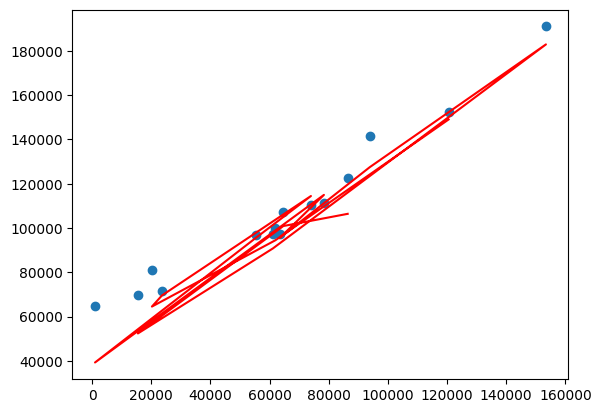

In [20]:
plt.scatter(x_test['RnD'], y_test)
plt.plot(x_test['RnD'], y_pred, color="red")

## PCA

In [18]:
x_test.head()

,RnD,Administration,Marketing,State
8,120542.52,148718.95,311613.29,2
30,61994.48,115641.28,91131.24,1
38,20229.59,65947.93,185265.10,2
42,23640.93,96189.63,148001.11,0
22,73994.56,122782.75,303319.26,1


In [38]:
from sklearn.decomposition import PCA

# create pca object
pca = PCA(n_components=1)

# fit training data 
pca.fit(x_train)

# transform training data
train_data = pca.fit_transform(x_train)

In [39]:
train_data[:5]

array([[ -64446.63419197],
       [-108277.73211663],
       [  65300.9535357 ],
       [ 143371.15202137],
       [ 166894.84646429]])

### create a model using the extracted column

In [40]:
from sklearn.linear_model import LinearRegression

# create empty model
model = LinearRegression()

# train the model
model.fit(train_data, y_train)

LinearRegression()

### training model evaluation

In [41]:
from sklearn.metrics import r2_score

# get the prediction for training data
y_pred = model.predict(train_data)

r2 = r2_score(y_train, y_pred)
print(f"r2 score = {r2}")

r2 score = 0.6857098935748094


Text(0.5, 1.0, 'Dimensionality Reduction')

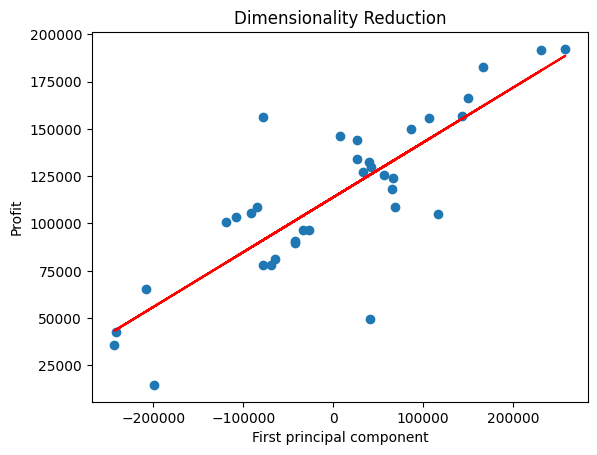

In [44]:
plt.scatter(train_data, y_train, label="observed")
plt.plot(train_data, y_pred, color="red", label="best fit regression line")
plt.xlabel("First principal component")
plt.ylabel("Profit")
plt.title("Dimensionality Reduction")